In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import xesmf
import cartopy.crs as ccrs

In [4]:
gds = xesmf.util.grid_global(1, 1, cf=True, lon1=360)
gds = gds.drop_vars("latitude_longitude")

In [5]:
gmesh = xesmf.util.grid_global(2, 2, cf=True, lon1=360)
gmesh = gmesh.drop_vars("latitude_longitude")

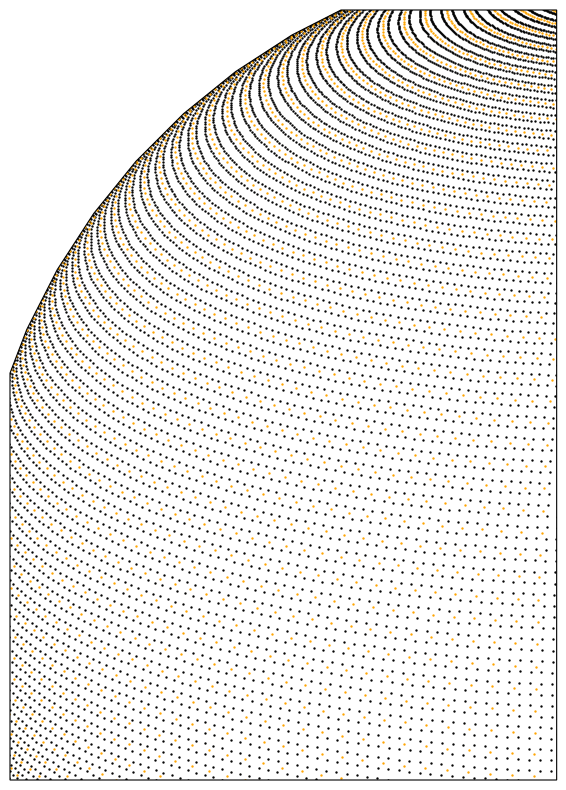

In [7]:
nrows=1
ncols=1
fig, ax = plt.subplots(
    nrows,
    ncols,
    figsize=(ncols*10, nrows*10),
    subplot_kw={"projection": ccrs.Orthographic(central_longitude=-120, central_latitude=20)},
)

for xds, factor, color in zip([gds, gmesh], [10, 5], ["black", "orange"]):
    lon, lat = np.meshgrid(xds.lon, xds.lat)
    #ax.scatter(lon[:factor,:factor], lat[:factor, :factor], c=color)
    ax.scatter(lon, lat, c=color, transform=ccrs.PlateCarree(), s=1/2)
    ax.set_extent([-190, -150, 0, 80], crs=ccrs.PlateCarree())

In [8]:
gmesh.to_netcdf(f"latentx2.global1degree.unsorted.nc")